In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
%reload_ext autoreload

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import CT400_control
from scipy.signal import find_peaks

In [3]:
def_pow = 6
yen = CT400_control.Yenista_CT400(def_pow)

Initialising CT400...
Error/Warning: 0
Initialisation complete

Default laser power: 6mW
Number of Inputs: 1
Number of Detectors: 4


# Detector calibration

In [18]:
yen.scan_config(1500, 1630, def_pow, 16, [1,0,0,0], 100)
det = 2

Configuring laser for scan
Scan configuration complete
Configuration settings:
Wavelength range: 1500-1630nm, Power: 6mW, Resolution: 16pm, Speed: 100nm/s, Detectors enabled: D1:1 D2:1 D3:0 D4:0 BNC:0


In [22]:
wavs, det_pows = yen.perform_scan([det])

Beginning scan...
Scan executed in 3.75s
Total number of points, discarded points, resampled points: 9764, 22, 8126



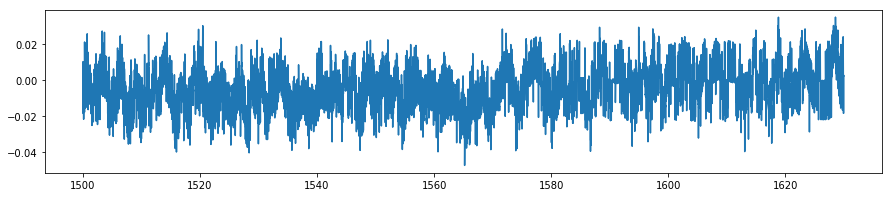

In [23]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(wavs, det_pows[0])
plt.show()

In [21]:
yen.update_det_calib(det)

Calibration for detector 2 updated


# Structure coupling

In [61]:
yen.print_det_pows([0,1,2])

Pout: 0.479 dBm
P1: -68.445 dBm
P2: -73.874 dBm


In [24]:
yen.las_on(1550, def_pow)

Laser on and set to 1550nm and 6mW


Laser on and set to 1550nm and 6mW


<IPython.core.display.Javascript object>


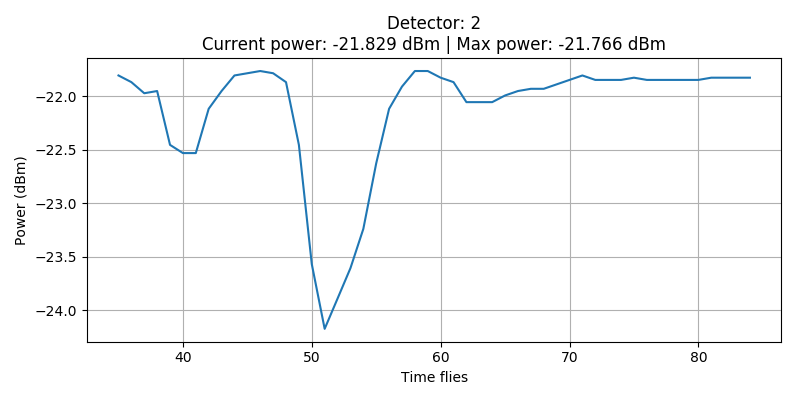

Plotting stopped


In [61]:
coup_wav = 1550
yen.las_on(coup_wav, def_pow)
yen.plot_powers(det=2)